<a href="https://colab.research.google.com/github/nadakhatib/Assignment-3-AI/blob/main/Ass3AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fashion-MNIST CNN Assignment**

**Name**: Nada Iyad Mohammed ElKhatib

---

**Student ID**:  120220017

---

**University:** University of Palestine

---

**Major:** Software Engineering

---

**Faculty:** Faculty of Software Engineering and Artificial Intelligence

---

**Assignment:** 3

---

**Course:** Introduction to Artificial Intelligence

---


## **Phase 1: Load Dataset**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-shuffled Fashion-MNIST train and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


# **Phase 2: Display & Visualize Data**

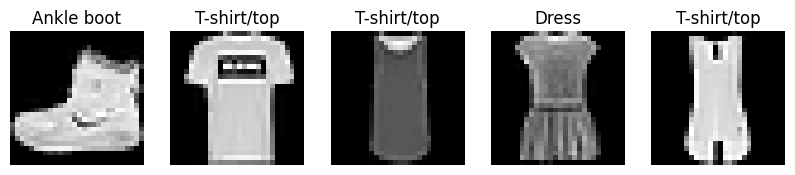

In [ ]:
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
                        "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Display a few images from the training set
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(fashion_mnist_labels[y_train[i]])
    plt.axis('off')
plt.show()


# **Step 3.3: Define CNN Architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),

    Conv2D(32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

# **Phase 4: Train Model**

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to one-hot encoding
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)


# Optional: save best weights during training
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='best_model.h5', verbose=1, save_best_only=True)

# Train the model
model.fit(x_train, y_train_categorical, batch_size=64, epochs=10, validation_split=0.1, callbacks=[checkpointer])

# **Phase 5: Test Model**

In [ ]:
# Load best weights (optional)
model.load_weights('best_model.h5')

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# **Phase 6: Evaluate & Save Model**

In [ ]:
# Save the entire model
model.save('fashion_mnist_cnn.h5')
print("Model successfully saved as 'fashion_mnist_cnn.h5'")

# **Plot Training & Validation Accuracy**

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


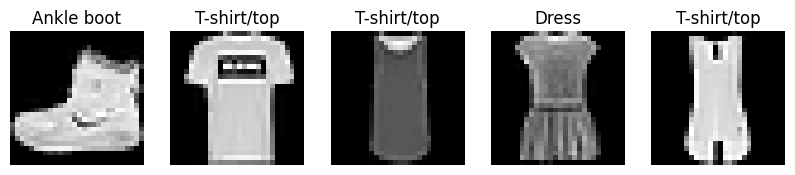

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6930 - loss: 0.8325
Epoch 1: val_loss improved from inf to 0.39308, saving model to best_model.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 72s 83ms/step - accuracy: 0.6931 - loss: 0.8322 - val_accuracy: 0.8597 - val_loss: 0.3931
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8419 - loss: 0.4334
Epoch 2: val_loss improved from 0.39308 to 0.33164, saving model to best_model.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.8419 - loss: 0.4334 - val_accuracy: 0.8765 - val_loss: 0.3316
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8613 - loss: 0.3832
Epoch 3: val_loss improved from 0.33164 to 0.30173, saving model to best_model.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8613 - loss: 0.3832 - val_accuracy: 0.8898 - val_loss: 0.3017
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8746 - loss: 0.3451
Epoch 4: val_loss improved from 0.30173 to 0.28989, saving model to best_model.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.8746 - loss: 0.3451 - val_accuracy: 0.8932 - val_loss: 0.2899
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8805 - loss: 0.3254
Epoch 5: val_loss improved from 0.28989 to 0.26210, saving model to best_model.h5


844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.8805 - loss: 0.3254 - val_accuracy: 0.9048 - val_loss: 0.2621
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8889 - loss: 0.3000
Epoch 6: val_loss did not improve from 0.26210
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.8889 - loss: 0.3000 - val_accuracy: 0.9037 - val_loss: 0.2689
Epoch 7/10
621/844 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.8918 - loss: 0.2930

In [ ]:
# =====================================================
# Fashion-MNIST CNN Assignment
# =====================================================
# Name: Nada Iyad Mohammed ElKhatib
# Student ID: 120220017
# University: University of Palestine
# Major: Software Engineering
# Faculty: Faculty of Software Engineering and AI
# Assignment: 3
# Course: Introduction to Artificial Intelligence
# =====================================================

# -----------------------
# Phase 1: Load Dataset
# -----------------------
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-shuffled Fashion-MNIST train and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# -----------------------
# Phase 2: Display & Visualize Data
# -----------------------
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
                        "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Display a few images from the training set
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(fashion_mnist_labels[y_train[i]])
    plt.axis('off')
plt.show()

# -----------------------
# Phase 3: Build CNN Model
# -----------------------
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data for CNN input
w, h = 28, 28
x_train = x_train.reshape(-1, w, h, 1)
x_test = x_test.reshape(-1, w, h, 1)

# One-hot encode labels
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define CNN architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),

    Conv2D(32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

# -----------------------
# Phase 4: Train Model
# -----------------------
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Save best weights during training
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='best_model.h5', verbose=1, save_best_only=True)

# Train the model
history = model.fit(x_train, y_train_categorical, batch_size=64, epochs=10, validation_split=0.1, callbacks=[checkpointer])

# Optional: Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# -----------------------
# Phase 5: Test Model
# -----------------------
# Load best weights
model.load_weights('best_model.h5')

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# -----------------------
# Phase 6: Evaluate & Save Model
# -----------------------
# Save the entire model
model.save('fashion_mnist_cnn.h5')
print("Model successfully saved as 'fashion_mnist_cnn.h5'")